In [1]:
%load_ext autoreload
%autoreload 2

from utils.yfcos_utils import *

ds_metadata, ds_dicts = register_datasets()


Metadata Catalog from custom dataset:
Metadata(evaluator_type='coco', image_root='/mnt/zerowastepublic/02-datasets/ds2/images', json_file='/mnt/zerowastepublic/02-datasets/ds2/dataset_config/ds2_3c_test_coco_instances.json', name='custom_dataset_test', thing_classes=['utensils', 'coffeeCup', 'clearCup'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2})


In [2]:
#mymodel = 'yfcos_ds2_r101_x02'
mymodel = 'yfcos_ds2_r50_x08'
yfmnt = f'/mnt/zerowastepublic/03-experiments/ds2/yolact_fcos/{mymodel}/'
MODLE_PATH = os.path.join(yfmnt, 'model_final.pth')
MODLE_CFG_PATH = os.path.join(yfmnt, 'config.yaml')
METRICS_FILE = os.path.join(yfmnt, 'metrics.json')

#cfg, predictor = setup_model(mymodel, MODLE_PATH)

In [3]:
import glob
model_checkpoint_path = glob.glob(yfmnt+"model_*.pth")
#model_checkpoint_path


checkpoints=[]
[checkpoints.append(os.path.basename(checkpoint_path)) for checkpoint_path in model_checkpoint_path] 
checkpoints

['model_0004999.pth',
 'model_0009999.pth',
 'model_0014999.pth',
 'model_0019999.pth',
 'model_final.pth']

In [4]:
APs =[]
AP50s = []
AP75s = []

In [6]:
from fcos.config import get_cfg
from fcos.checkpoint import AdetCheckpointer

from detectron2.modeling import build_model
from detectron2.data import build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset


In [7]:
for checkpoint in checkpoints:
    print('--------------------------------------- ',checkpoint,' ---------------------------------------------')

    MODEL_PATH = os.path.join(yfmnt, checkpoint)
    cfg = get_cfg()
    cfg.merge_from_file(f"configs/Yolact/{mymodel}.yaml")
    cfg.MODEL.FCOS.INFERENCE_TH_TEST = 0.6 # 0.3 for vids
    
    #cfg, predictor = setup_model(yfmnt, MODEL_PATH)

    model = build_model(cfg)
    AdetCheckpointer(model).load(MODEL_PATH)
    
    #evaluator = COCOEvaluator("ead_validation_1", cfg, False, output_dir=model_path+"/")
    evaluator = COCOEvaluator("custom_dataset_test", cfg, False, output_dir="/home/redne/notebooks/output/")
    val_loader = build_detection_test_loader(cfg, "custom_dataset_test")
    a = inference_on_dataset(model, val_loader, evaluator)
    
    APs.append(a.get('bbox')['AP'])
    AP50s.append(a.get('bbox')['AP50'])
    AP75s.append(a.get('bbox')['AP75'])

Config 'configs/Yolact/yfcos_ds2_r50_x08.yaml' has no VERSION. Assuming it to be compatible with latest v2.


---------------------------------------  model_0004999.pth  ---------------------------------------------


Config 'configs/Yolact/yfcos_ds2_r50_x08.yaml' has no VERSION. Assuming it to be compatible with latest v2.


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.743
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.906
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.866
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.794
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.747
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.774
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.774
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.774
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

Config 'configs/Yolact/yfcos_ds2_r50_x08.yaml' has no VERSION. Assuming it to be compatible with latest v2.


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.856
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.952
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.952
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.850
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.869
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.869
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.869
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

Config 'configs/Yolact/yfcos_ds2_r50_x08.yaml' has no VERSION. Assuming it to be compatible with latest v2.


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.865
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.952
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.952
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.863
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.877
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.877
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.877
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

Config 'configs/Yolact/yfcos_ds2_r50_x08.yaml' has no VERSION. Assuming it to be compatible with latest v2.


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.01s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.859
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.952
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.952
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.900
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.854
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.873
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.873
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.873
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1

In [14]:
evaluator.process

In [8]:
APs

[74.3132051300368,
 85.60726072607261,
 86.48679867986799,
 85.92904290429043,
 85.92904290429043]

In [9]:
import matplotlib.pyplot as plt

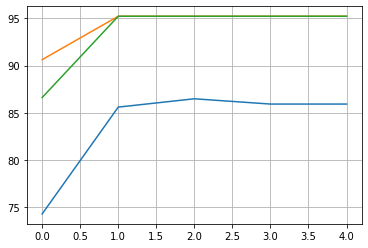

In [10]:
plt.grid(True)
plt.plot(APs)
plt.plot(AP50s)
plt.plot(AP75s)

In [11]:
APs

[74.3132051300368,
 85.60726072607261,
 86.48679867986799,
 85.92904290429043,
 85.92904290429043]

In [12]:
AP50s


[90.62406240624064,
 95.21452145214522,
 95.21452145214522,
 95.21452145214522,
 95.21452145214522]

---
## Plot Losses

Can also view in tensorboard:

```
nvidia-docker run -it -v /mnt/zerowastepublic/03-experiments/ds2:/mnt/zerowastepublic  -p 6006:6006 tensorflow/tensorflow:1.12.0-gpu-py3 bash 
cd /mnt/zerowastepublic/yolact_fcos/

tensorboard --logdir yfcos_ds2_r50_x08:yfcos_ds2_r50_x08/,\
yfcos_ds2_r101_x01:yfcos_ds2_r101_x01/,\
yfcos_ds2_r101_x02:yfcos_ds2_r101_x02/,\
yfcos_ds2_r50_x06:yfcos_ds2_r50_x06/yfcos_ds2_r50_x06/
```

In [45]:
yfcos_path = '/mnt/zerowastepublic/03-experiments/ds2/yolact_fcos/'
os.listdir(yfcos_path)

['archive',
 'yfcos_ds2_r101_x01',
 'yfcos_ds2_r101_x02',
 'yfcos_ds2_r50_x01_test',
 'yfcos_ds2_r50_x06',
 'yfcos_ds2_r50_x06v2',
 'yfcos_ds2_r50_x08',
 'yolactfcos_r50_ds2_x1',
 'yolactfcos_r50_ds2_x1_test']

In [86]:
# 'yfcos_ds2_r50_x06/yfcos_ds2_r50_x06/'
models_in_scope = ['yfcos_ds2_r101_x02', 'yfcos_ds2_r50_x08', 'yfcos_ds2_r50_x06/yfcos_ds2_r50_x06/']

metric_files = list()
[metric_files.append(os.path.join(yfcos_path, m,'metrics.json')) for m in models_in_scope]
metric_files

['/mnt/zerowastepublic/03-experiments/ds2/yolact_fcos/yfcos_ds2_r101_x02/metrics.json',
 '/mnt/zerowastepublic/03-experiments/ds2/yolact_fcos/yfcos_ds2_r50_x08/metrics.json',
 '/mnt/zerowastepublic/03-experiments/ds2/yolact_fcos/yfcos_ds2_r50_x06/yfcos_ds2_r50_x06/metrics.json']

a metric file looks like this:

```json 
{
    'data_time': 0.0065533440065337345,
     'eta_seconds': 75.15423759885016,
     'iteration': 19979,
     'loss_fcos_cls': 0.001449436298571527,
     'loss_fcos_ctr': 0.5844207108020782,
     'loss_fcos_loc': 0.02412377018481493,
     'loss_mask': 0.008787753991782665,
     'lr': 2.5000000000000005e-08,
     'time': 3.5934926730042207,
     'total_loss': 0.6194688804098405
}
```

In [87]:
iterations = cfg.SOLVER.MAX_ITER  # usually 20000

def loss_from_metrics(file, iterations=20000):
    if file == '/mnt/zerowastepublic/03-experiments/ds2/yolact_fcos/yfcos_ds2_r50_x06/yfcos_ds2_r50_x06/metrics.json':
        iterations=40000
    loss = []
    for line in open(file, 'r'):
        result = json.loads(line)
        
        loss.append(result['total_loss'])
    loss_idx = [int(item) for item in list(np.linspace(0, iterations, len(loss)))]
    
    return loss, loss_idx

In [88]:
val_dict = dict()
for metric_file in metric_files:
    model_exp_name = metric_file.split("/")[-2]
    loss_, loss_idx_ = loss_from_metrics(metric_file)
    val_dict[model_exp_name] = {
        'loss': loss_,
        'loss_idx': loss_idx_
    }


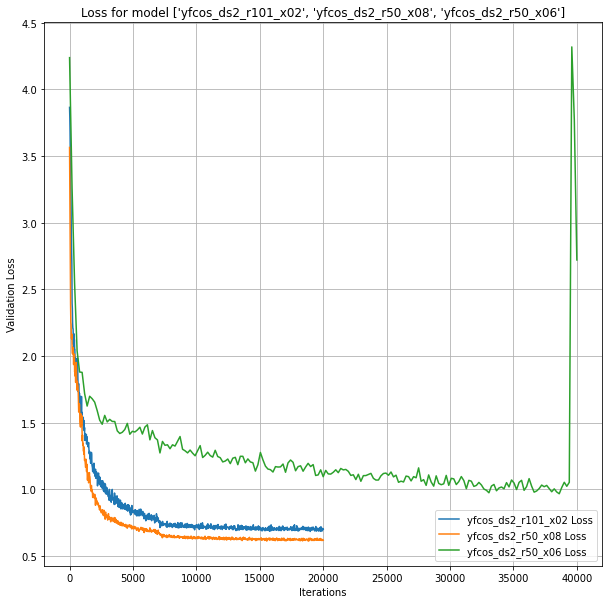

In [89]:
plt.figure(figsize=(10, 10))
for model_namex in list(val_dict.keys()):
    plt.plot(val_dict[model_namex]['loss_idx'],
             val_dict[model_namex]['loss'], label=f'{model_namex} Loss')

plt.title('Loss for model ' + '{0}'.format(list(val_dict.keys())))
plt.xlabel('Iterations')
plt.ylabel('Validation Loss')
plt.grid('True')
plt.legend()
#plt.savefig(os.path.join(savepath, filename))

---
### Archive

In [18]:
for line in open(METRICS_FILE, 'r'):
    result = json.loads(line)

In [90]:
result

{'data_time': 0.0065533440065337345,
 'eta_seconds': 75.15423759885016,
 'iteration': 19979,
 'loss_fcos_cls': 0.001449436298571527,
 'loss_fcos_ctr': 0.5844207108020782,
 'loss_fcos_loc': 0.02412377018481493,
 'loss_mask': 0.008787753991782665,
 'lr': 2.5000000000000005e-08,
 'time': 3.5934926730042207,
 'total_loss': 0.6194688804098405}

In [15]:
import torch 
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


#inf_pred = "../inference_output/instances_predictions.pth"
inf_pred = "/home/redne/notebooks/output/instances_predictions.pth"
preds = torch.load(inf_pred)

-----

In [25]:
import json
from collections import OrderedDict
 
with open('/home/redne/notebooks/output/coco_instances_results.json', encoding="utf-8") as data_file:    
    data = json.load(data_file)#, object_pairs_hook=OrderedDict)


for item in data[:5] :
  print('id', item['image_id'], 'score :', item['score'],'===', 'bbox:', item['bbox'])

id 0 score : 0.9500824213027954 === bbox: [347.1583251953125, 29.32404899597168, 903.1224365234375, 951.6009521484375]
id 0 score : 0.9312323927879333 === bbox: [524.5166625976562, 0.0, 940.1331176757812, 1068.273681640625]
id 0 score : 0.7494790554046631 === bbox: [404.641357421875, 0.0, 960.4454345703125, 123.1943588256836]
id 1 score : 0.9386144280433655 === bbox: [778.4873657226562, 0.0, 576.9508666992188, 472.113525390625]
id 1 score : 0.9335082173347473 === bbox: [585.3693237304688, 165.22328186035156, 237.1326904296875, 324.89422607421875]


In [26]:
item.keys()

dict_keys(['image_id', 'category_id', 'bbox', 'score', 'segmentation'])

In [29]:
item

{'image_id': 1,
 'category_id': 3,
 'bbox': [585.3693237304688,
  165.22328186035156,
  237.1326904296875,
  324.89422607421875],
 'score': 0.9335082173347473,
 'segmentation': {'size': [1080, 1920],
  'counts': 'hina05cQ10000000bf\\1<oXcN5L4L4K5L4K6]MYOkSOn0ei0XOPVO8Lk0ki0XOlUO?Df0Uj0ZOhUOY3mi0a2_O?H7I7M3K4M4M3M3M3M4L3N2N2N1O101O0O101O0O2O0O101O000O2O00000O101O0O10001N10000O2O0O101N100O2O00001N10001N100000000O2O000000000000000000000O2O01O0000000000000000001O00000000000000001O00000000001O000000001O000000001O000O101O000000001O00001O00001O0O2O00001O001O0O2O1O001N2O1O1N2O1O2N1N3N1O3M2N3L4M3M4L3M3L3N3M3M3M3M3M3M2N3L3N2N2N1O3M4L3M4L5J5L4L3M3M2N3M4K5L5K6J4L5K5J5L3M3M4L5J7J4K5K5L4K4L4M3L3M2O2M4M2M4L4M3L3M3M3M3L3L5J6I9F:G8I:FekYT1'}}

-----
### TODO Calc and Print maps (optimize) 


In [ ]:
# https://github.com/od-submission/od-testing/blob/1b576537926caf647304cc29d86fd14b34fd548e/src/object_extraction/Step1_extract_object.py
def calc_map(ap_data):
    print('Calculating mAP...')
    aps = [{'box': [], 'mask': []} for _ in iou_thresholds]

    for _class in range(len(cfg.dataset.class_names)):
        for iou_idx in range(len(iou_thresholds)):
            for iou_type in ('box', 'mask'):
                ap_obj = ap_data[iou_type][iou_idx][_class]

                if not ap_obj.is_empty():
                    aps[iou_idx][iou_type].append(ap_obj.get_ap())

    all_maps = {'box': OrderedDict(), 'mask': OrderedDict()}

    # Looking back at it, this code is really hard to read :/
    for iou_type in ('box', 'mask'):
        all_maps[iou_type]['all'] = 0 # Make this first in the ordereddict
        for i, threshold in enumerate(iou_thresholds):
            mAP = sum(aps[i][iou_type]) / len(aps[i][iou_type]) * 100 if len(aps[i][iou_type]) > 0 else 0
            all_maps[iou_type][int(threshold*100)] = mAP
        all_maps[iou_type]['all'] = (sum(all_maps[iou_type].values()) / (len(all_maps[iou_type].values())-1))

    print_maps(all_maps)
    return all_maps

def print_maps(all_maps):
    # Warning: hacky
    make_row = lambda vals: (' %5s |' * len(vals)) % tuple(vals)
    make_sep = lambda n:  ('-------+' * n)

    print()
    print(make_row([''] + [('.%d ' % x if isinstance(x, int) else x + ' ') for x in all_maps['box'].keys()]))
    print(make_sep(len(all_maps['box']) + 1))
    for iou_type in ('box', 'mask'):
        print(make_row([iou_type] + ['%.2f' % x for x in all_maps[iou_type].values()]))
    print(make_sep(len(all_maps['box']) + 1))
    print()


---
### yolact_d

In [30]:
import pickle
#from yfcos_utils import CPDataObject

In [34]:
AP_FILE = '/home/redne/mnt/project_zero/project_zero/ds1/experiments/output/yolact_d/yolactpp_R50_061620/results/ap_data.pkl'
with open(AP_FILE, 'rb') as f:
    ap_data = pickle.load(f)

In [38]:
iou_thresholds = [x / 100 for x in range(50, 100, 5)]
iou_thresholds

[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

In [36]:
def calc_map(ap_data):
    print('Calculating mAP...')
    aps = [{'box': [], 'mask': []} for _ in iou_thresholds]
         
    for _class in range(len(cfg.dataset.class_names)):
        for iou_idx in range(len(iou_thresholds)):
            for iou_type in ('box', 'mask'):
                ap_obj = ap_data[iou_type][iou_idx][_class]

                if not ap_obj.is_empty():
                    aps[iou_idx][iou_type].append(ap_obj.get_ap())

    all_maps = {'box': OrderedDict(), 'mask': OrderedDict()}

    # Looking back at it, this code is really hard to read :/
    for iou_type in ('box', 'mask'):
        all_maps[iou_type]['all'] = 0 # Make this first in the ordereddict
        for i, threshold in enumerate(iou_thresholds):
            mAP = sum(aps[i][iou_type]) / len(aps[i][iou_type]) * 100 if len(aps[i][iou_type]) > 0 else 0
            all_maps[iou_type][int(threshold*100)] = mAP
        all_maps[iou_type]['all'] = (sum(all_maps[iou_type].values()) / (len(all_maps[iou_type].values())-1))
    
    print_maps(all_maps)
    
    # Put in a prettier format so we can serialize it to json during training
    all_maps = {k: {j: round(u, 2) for j, u in v.items()} for k, v in all_maps.items()}
    return all_maps

In [39]:
my_maps = calc_map(ap_data)

Calculating mAP...


AttributeError: dataset